In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df_ibex = pd.read_csv('ibex.csv', parse_dates=True, index_col=0).close
df_spy = pd.read_csv('spy.csv', parse_dates=True, index_col=0).close

In [3]:
df_ibex

date
2015-02-20    26056.4
2015-02-23    26321.7
2015-02-24    26500.0
2015-02-25    26464.0
2015-02-26    26679.5
               ...   
2020-02-13    28924.2
2020-02-14    29061.6
2020-02-17    29252.2
2020-02-18    29212.2
2020-02-19    29439.5
Name: close, Length: 1278, dtype: float64

In [4]:
df_spy

date
2015-02-20    211.24
2015-02-23    211.21
2015-02-24    211.81
2015-02-25    211.63
2015-02-26    211.38
               ...  
2020-02-12    337.42
2020-02-13    337.06
2020-02-14    337.60
2020-02-18    336.73
2020-02-19    338.34
Name: close, Length: 1258, dtype: float64

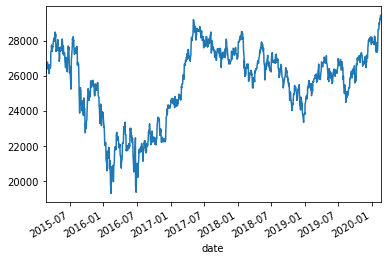

In [5]:
df_ibex.plot()

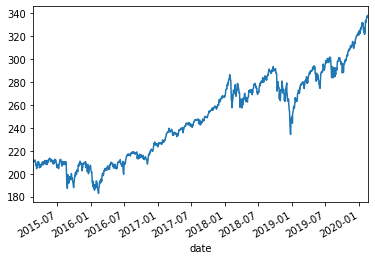

In [6]:
df_spy.plot()

In [7]:
df_all = pd.DataFrame({'ibex': df_ibex, 'spy': df_spy}, index=df_spy.index)
df_all = df_all.dropna()

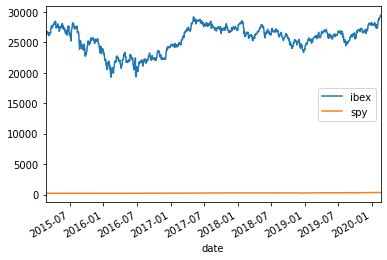

In [8]:
df_all.plot()

In [9]:
returns = df_all.pct_change()
returns = returns + 1
returns.iloc[0] = 1
compare = returns.cumprod()

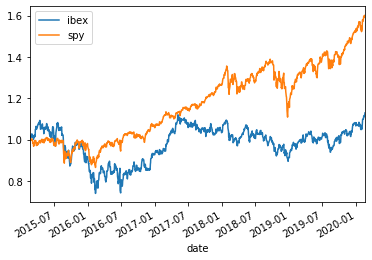

In [10]:
compare.plot()

In [11]:
r_spy_log = np.log(df_spy).diff().dropna()
r_spy = df_spy.pct_change().dropna()

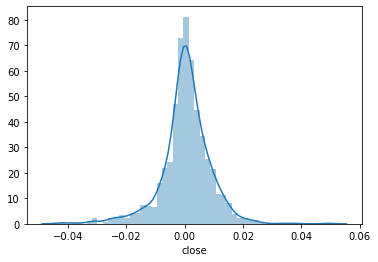

In [12]:
sns.distplot(r_spy_log)

In [13]:
r_ibex_log = np.log(df_ibex).diff().dropna()
r_ibex = df_ibex.pct_change().dropna()

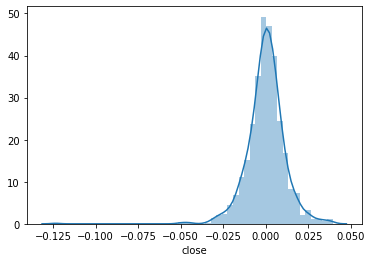

In [14]:
sns.distplot(r_ibex)

## Value at Risk (VaR)

### Parametrico

In [15]:
p_mean = r_spy_log.mean()
p_signa = r_spy_log.std()

In [16]:
var_parametrico = p_mean - 1.65*p_signa

In [17]:
var_parametrico

-0.013598889712512411

### Simulación historica

In [28]:
var_historico = r_spy_log.quantile(0.05)

In [29]:
var_historico

-0.012191671316279695

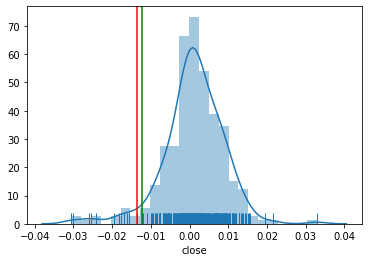

In [30]:
fig, ax = plt.subplots()
sns.distplot(r_spy_log, ax=ax, rug=True)
ax.axvline(var_parametrico, color='r')
ax.axvline(var_historico, color='g')

### Montecarlo

In [43]:
r_generated = np.random.normal(p_mean, p_signa, (10000,))

In [39]:
r_generated = pd.Series(r_generated)

In [40]:
var_montecarlo = r_generated.quantile(0.05)

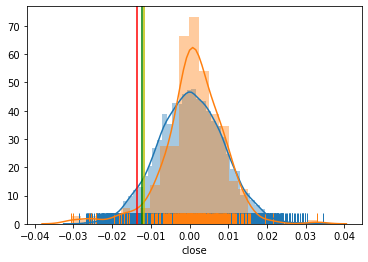

In [44]:
fig, ax = plt.subplots()
sns.distplot(r_generated, ax=ax, rug=True)
sns.distplot(r_spy_log, ax=ax, rug=True)
ax.axvline(var_parametrico, color='r')
ax.axvline(var_montecarlo, color='y')
ax.axvline(var_historico, color='g')

### Expected Shortfall (ES)

In [47]:
var_historico

-0.012191671316279695

In [45]:
es = r_spy_log[r_spy_log < var_historico].mean()

In [48]:
es

-0.019474271175459575

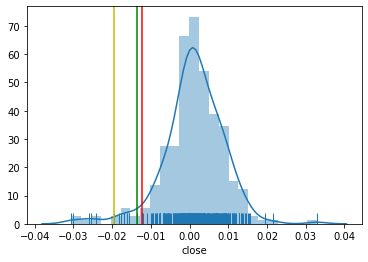

In [46]:
fig, ax = plt.subplots()
sns.distplot(r_spy_log, ax=ax, rug=True)
ax.axvline(var_historico, color='r')
ax.axvline(var_parametrico, color='g')
ax.axvline(es, color='y')